In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

import math
import random
import os
import time

from numpy import interp

In [3]:
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("/content/train.csv")

In [5]:
df.info(), df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


(None,
            count        mean        std    min    25%    50%    75%    max
 age        297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0
 sex        297.0    0.676768   0.468500    0.0    0.0    1.0    1.0    1.0
 cp         297.0    2.158249   0.964859    0.0    2.0    2.0    3.0    3.0
 trestbps   297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0
 chol       297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0
 fbs        297.0    0.144781   0.352474    0.0    0.0    0.0    0.0    1.0
 restecg    297.0    0.996633   0.994914    0.0    0.0    1.0    2.0    2.0
 thalach    297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0
 exang      297.0    0.326599   0.469761    0.0    0.0    0.0    1.0    1.0
 oldpeak    297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2
 slope      297.0    0.602694   0.618187    0.0    0.0    1.0    1.0    2.0
 ca         297.0    0.676768   0.938965    0.0    0.0    0.0    1.0    3.0
 thal

In [6]:
 df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Checking null values:

In [7]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


#All features and values

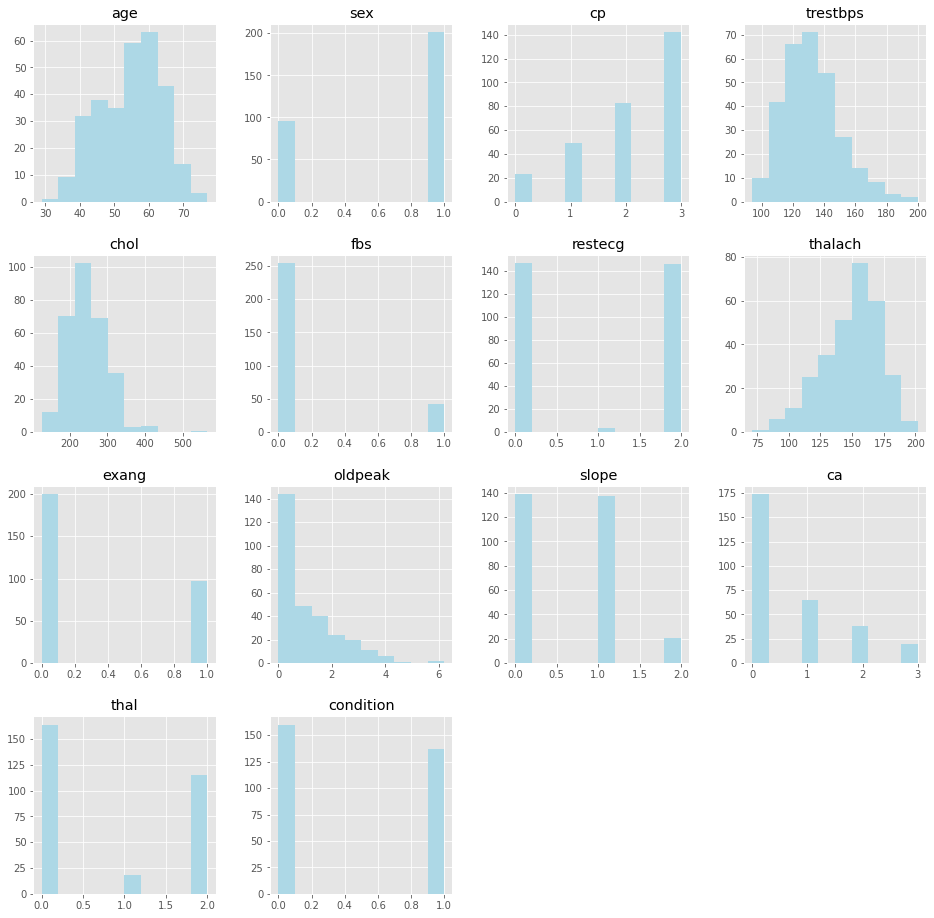

In [9]:
df.hist(figsize=(16, 16), color = "lightblue")
plt.show()

Split numeric and categorial features:

In [10]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = ["condition"]
numerical_features = list(set(df.columns).difference(categorical_features + target))

print(f'Numeric: {numerical_features}\nCatrorial: {categorical_features}')

Numeric: ['thalach', 'chol', 'age', 'oldpeak', 'trestbps']
Catrorial: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


##Categorical features

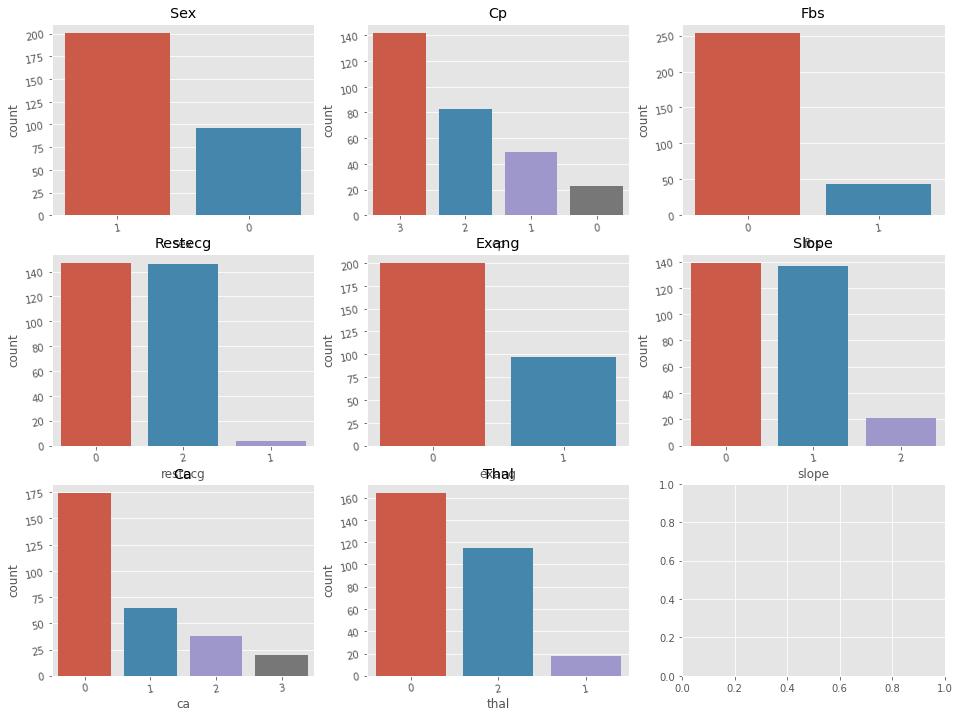

In [11]:
fig, axes = plt.subplots(3,3,figsize=(16, 12))
axes = axes.flatten()

for i, j in zip(df[categorical_features].columns, axes):
  sns.countplot(x=i, data=df, ax=j,
                      order=df[i].value_counts().index)
  j.tick_params(labelrotation=10)
        
  total = float(len(df[i]))
  j.set_title(f'{str(i).capitalize()}')
  plt.tight_layout  

##Numeric features:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

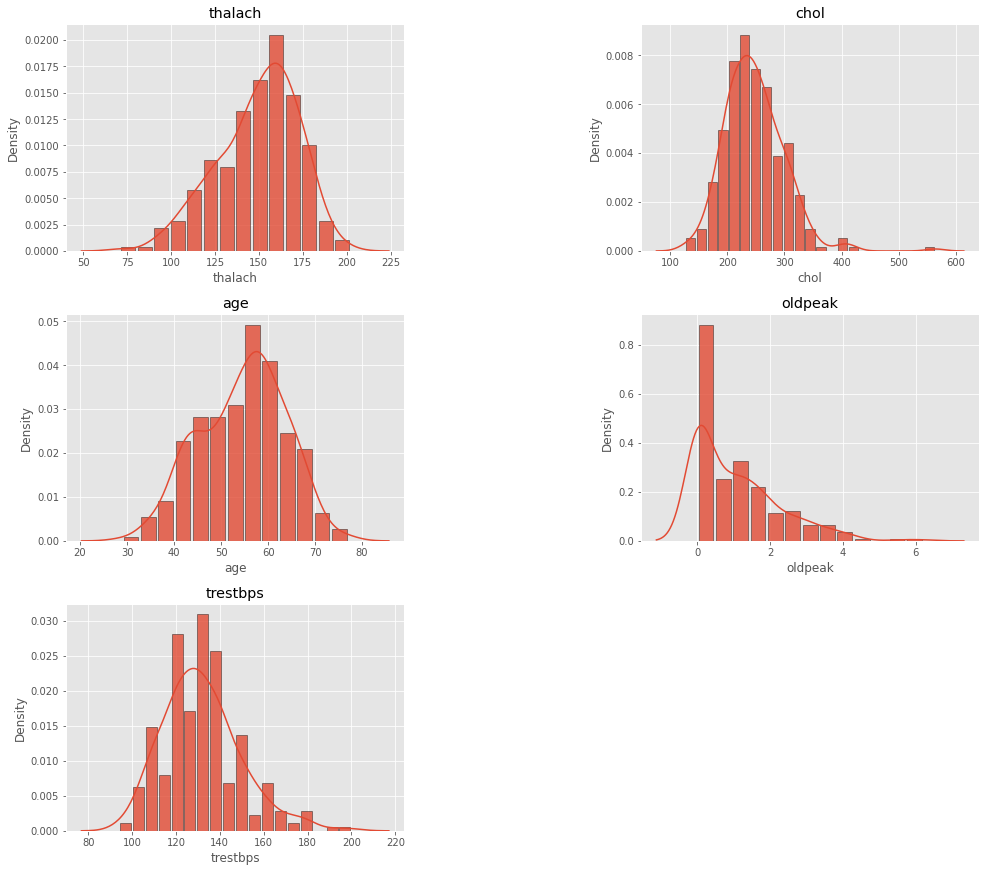

In [28]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))

grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

flag = True
level = 0
for i in range(5):
  fig_name = 'ax' + str(i)

  if flag:  
    fig_name = fig.add_subplot(grid[level, :2])
    fig_name.set_title(numerical_features[i])
    sns.distplot(df[numerical_features[i]],
                  hist_kws={
                  'rwidth': 0.85,
                  'edgecolor': 'black',
                  'alpha': 0.8},)
    flag = False
  else:
    fig_name = fig.add_subplot(grid[level, 3:5])
    fig_name.set_title(numerical_features[i])
    sns.distplot(df[numerical_features[i]],
                      hist_kws={
                      'rwidth': 0.85,
                      'edgecolor': 'black',
                      'alpha': 0.8},)
    flag = True
    level += 1

plt.show()

In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


##Correlations

Correlation heatmap between variables

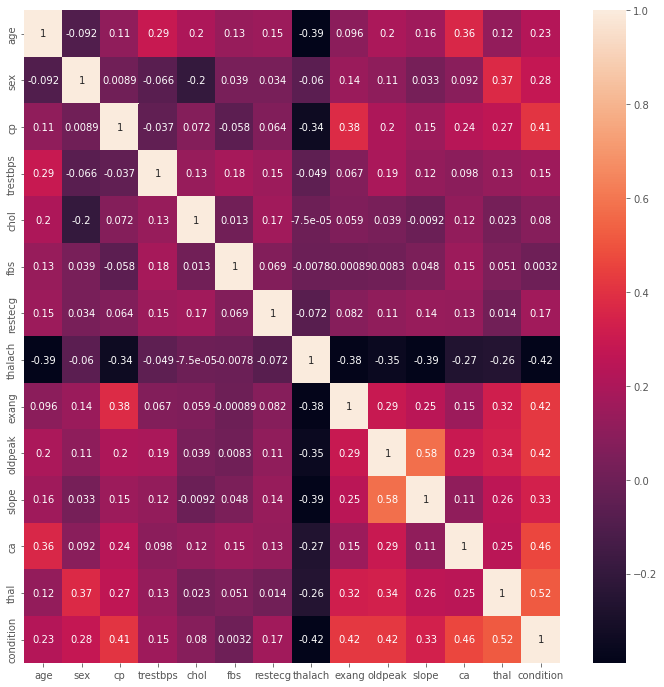

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, robust=True)